# California Housing — Linear Regression Walkthrough
This notebook demonstrates a complete regression workflow using the **California Housing dataset**, available from scikit-learn. We'll walk through data exploration, model training, evaluation, and assumptions.

**Steps covered:**
1. Load dataset & inspect structure
2. Exploratory Data Analysis (EDA)
3. Train/test split
4. Fit Linear Regression model
5. Evaluate with metrics (MAE, MSE, RMSE, R²)
6. Check regression assumptions with residual plots
7. (Optional) Improve with Ridge & Lasso


## 1. Setup & Imports

In [1]:
import sys, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reproducibility
np.random.seed(42)

## 2. Load Dataset
We use scikit-learn's California Housing dataset, which contains information like median income, house age, and population.

In [2]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 3. Exploratory Data Analysis (EDA)
Check shape, summary stats, missing values, and correlations.

In [3]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum())

df.describe()

Shape: (20640, 9)
Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

Missing values per column:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


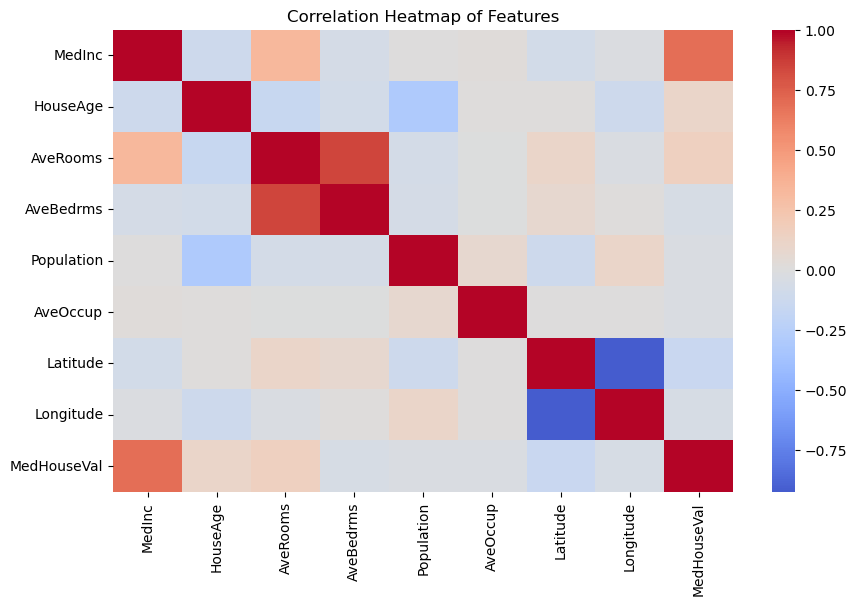

In [4]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features")
plt.show()

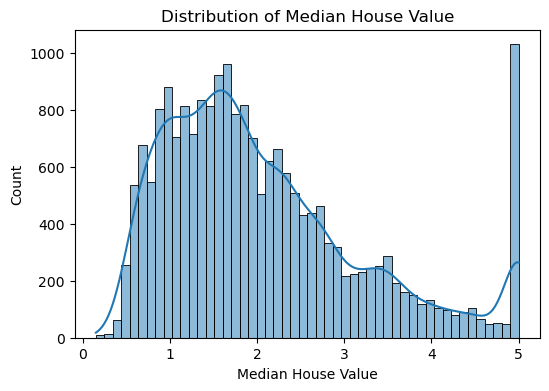

In [10]:
# Distribution of target variable (Median House Value)
plt.figure(figsize=(6,4))
sns.histplot(df["MedHouseVal"], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Count")
plt.show()



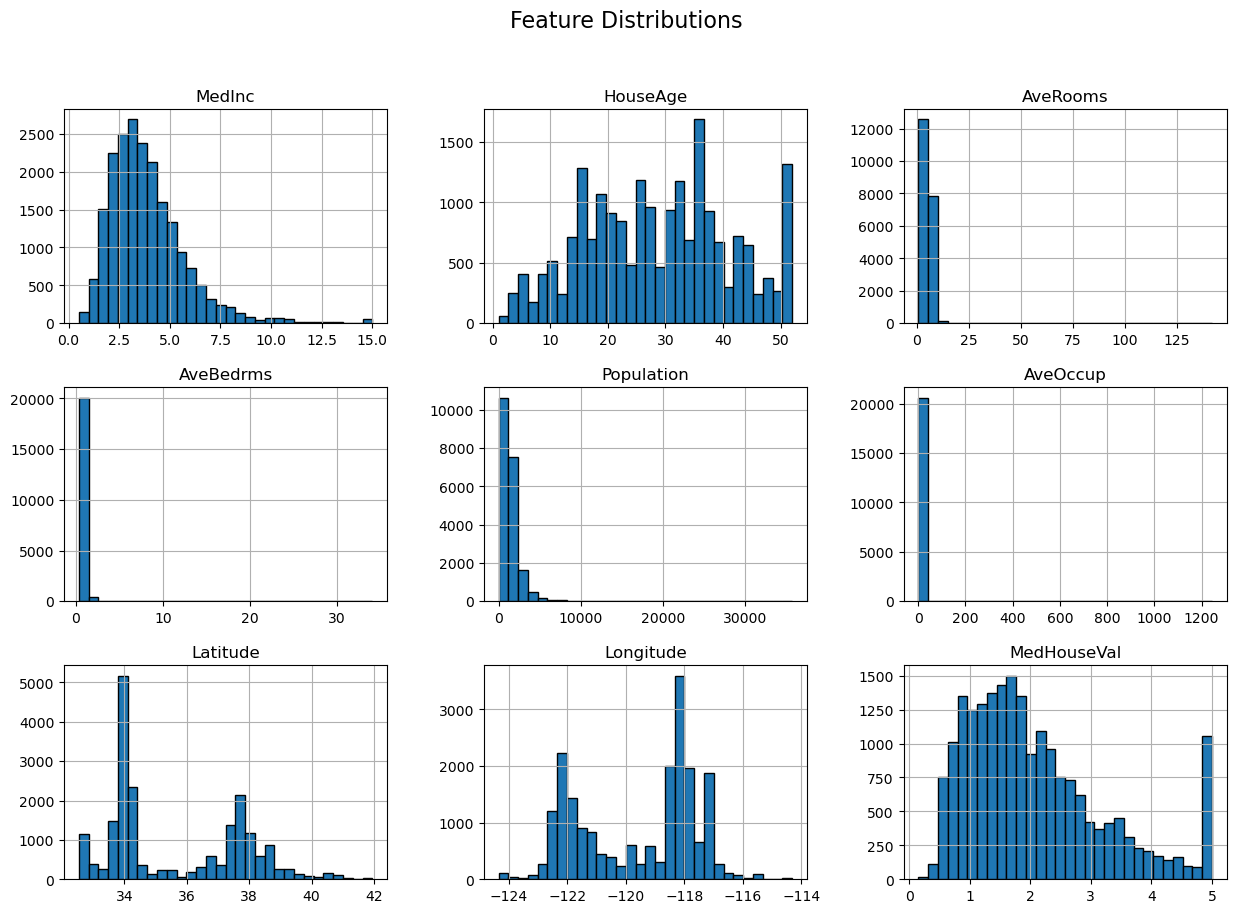

In [11]:
# Feature distributions
df.hist(bins=30, figsize=(15,10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

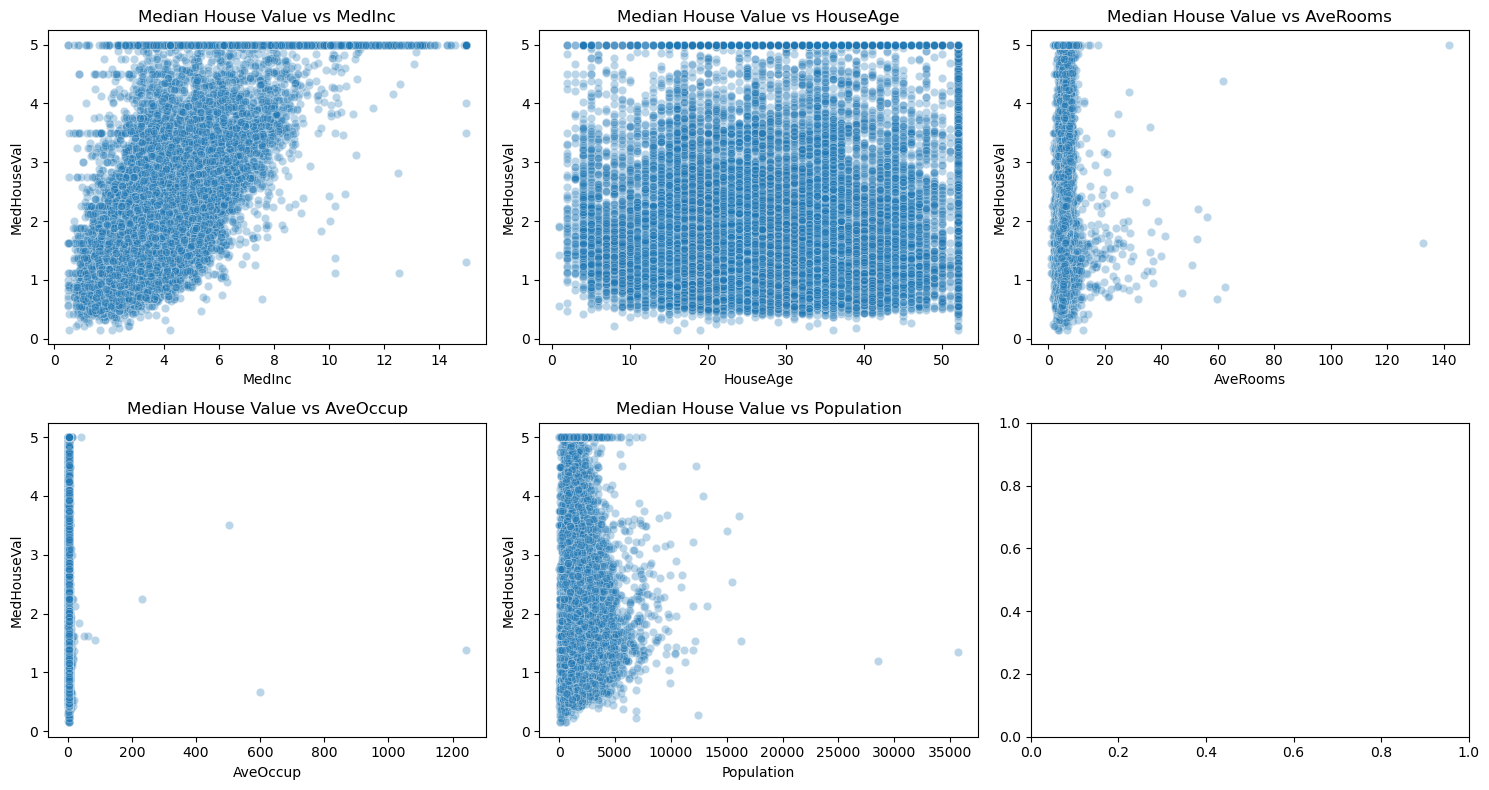

In [12]:
# Scatter plots of target vs key features
key_features = ["MedInc", "HouseAge", "AveRooms", "AveOccup", "Population"]
fig, axes = plt.subplots(2, 3, figsize=(15,8))
for i, col in enumerate(key_features):
    ax = axes[i//3, i%3]
    sns.scatterplot(x=df[col], y=df["MedHouseVal"], alpha=0.3, ax=ax)
    ax.set_title(f"Median House Value vs {col}")
plt.tight_layout()
plt.show()



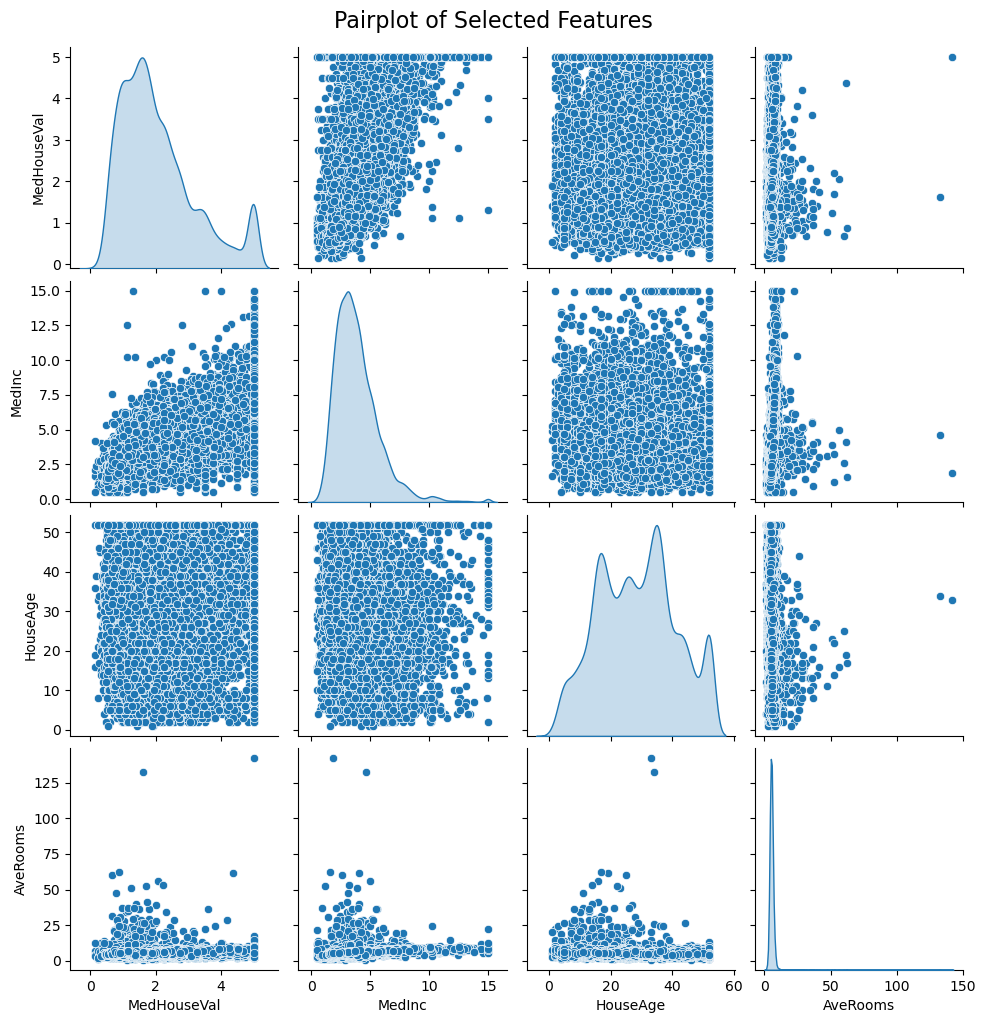

In [13]:
# Pairplot for selected features
sns.pairplot(df[["MedHouseVal", "MedInc", "HouseAge", "AveRooms"]], diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02, fontsize=16)
plt.show()


## 4. Split Data
Separate features (X) and target (y), then split into training and testing sets.

In [5]:
X = df.drop(columns=["MedHouseVal"])  # features
y = df["MedHouseVal"]  # target (median house value)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

## 5. Fit Linear Regression Model

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:")
for name, coef in zip(X.columns, model.coef_):
    print(f"  {name}: {coef:.4f}")

Intercept: -37.02327770606413
Coefficients:
  MedInc: 0.4487
  HouseAge: 0.0097
  AveRooms: -0.1233
  AveBedrms: 0.7831
  Population: -0.0000
  AveOccup: -0.0035
  Latitude: -0.4198
  Longitude: -0.4337


## 6. Predictions & Evaluation
We use standard regression metrics: MAE, MSE, RMSE, and R².

In [7]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def regression_report(y_true, y_pred, prefix=""):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{prefix}MAE : {mae:.4f}")
    print(f"{prefix}MSE : {mse:.4f}")
    print(f"{prefix}RMSE: {rmse:.4f}")
    print(f"{prefix}R²  : {r2:.4f}")

print("Train set:")
regression_report(y_train, y_train_pred, prefix="  ")
print("\nTest set:")
regression_report(y_test, y_test_pred, prefix="  ")

Train set:
  MAE : 0.5286
  MSE : 0.5179
  RMSE: 0.7197
  R²  : 0.6126

Test set:
  MAE : 0.5332
  MSE : 0.5559
  RMSE: 0.7456
  R²  : 0.5758


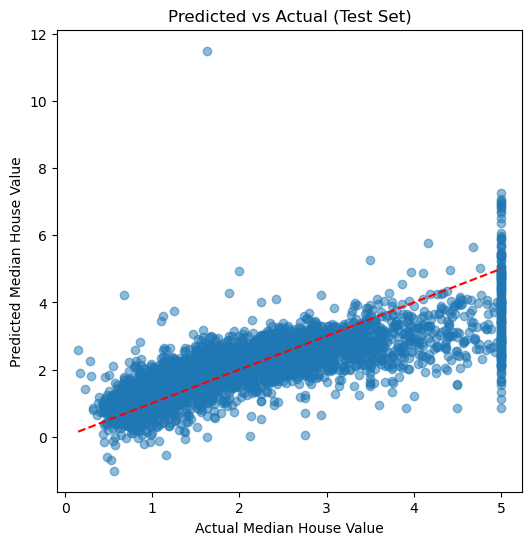

In [14]:
# Predicted vs Actual (Test set)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs Actual (Test Set)")
plt.show()

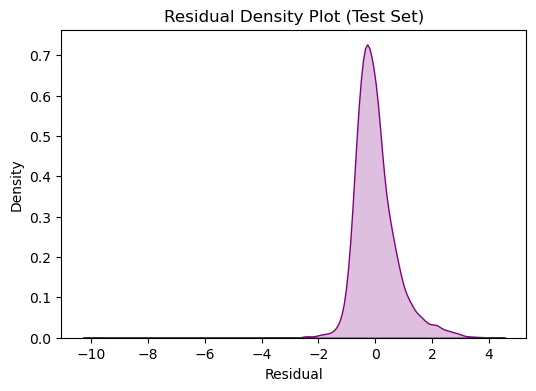

In [15]:
# Residual density plot
plt.figure(figsize=(6,4))
sns.kdeplot(y_test - y_test_pred, fill=True, color="purple")
plt.title("Residual Density Plot (Test Set)")
plt.xlabel("Residual")
plt.show()



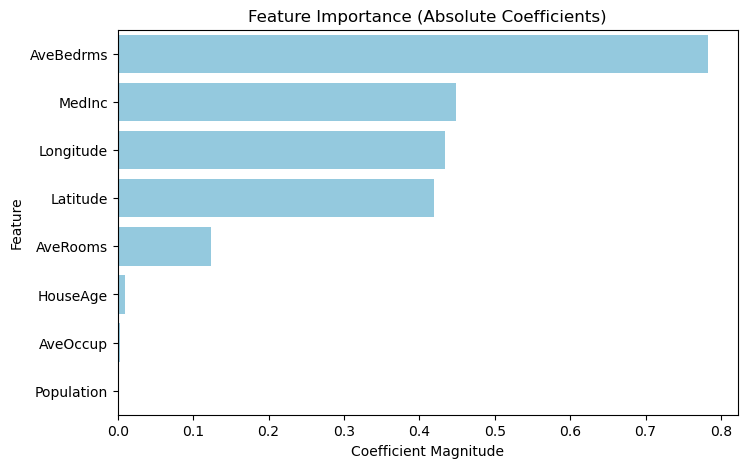

In [19]:
# Feature importance (absolute coefficients)
coef_importance = pd.Series(np.abs(model.coef_), index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=coef_importance.values, y=coef_importance.index, color="skyblue")  # single color avoids warning
plt.title("Feature Importance (Absolute Coefficients)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

## 7. Residual Analysis
Check assumptions of linear regression: linearity, homoscedasticity, normality.

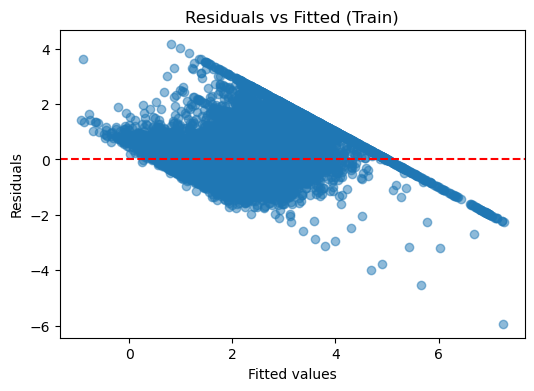

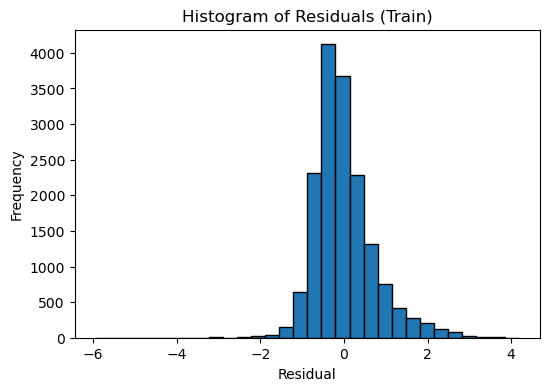

In [8]:
train_residuals = y_train - y_train_pred

# Residuals vs Fitted
plt.figure(figsize=(6,4))
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Train)")
plt.show()

# Histogram of residuals
plt.figure(figsize=(6,4))
plt.hist(train_residuals, bins=30, edgecolor='k')
plt.title("Histogram of Residuals (Train)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

## 8. Optional: Ridge & Lasso Regression
Compare performance of regularized linear models.

In [9]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01, max_iter=10000)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

print("Ridge (train R², test R²):", ridge.score(X_train, y_train), ridge.score(X_test, y_test))
print("Lasso (train R², test R²):", lasso.score(X_train, y_train), lasso.score(X_test, y_test))

Ridge (train R², test R²): 0.6125511245209703 0.5758549611440128
Lasso (train R², test R²): 0.6083136321985072 0.5845196673976367


### 📊 1. Compare Train vs Test R² (Bar Plot)
How Ridge vs Lasso compare in predictive performance (bar plot).

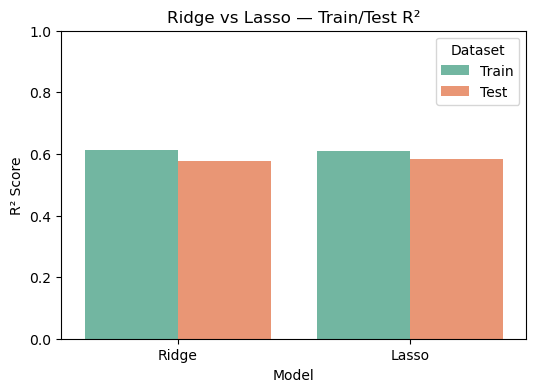

In [20]:
# Collect results
ridge_train_r2 = ridge.score(X_train, y_train)
ridge_test_r2  = ridge.score(X_test, y_test)
lasso_train_r2 = lasso.score(X_train, y_train)
lasso_test_r2  = lasso.score(X_test, y_test)

results = pd.DataFrame({
    "Model": ["Ridge", "Ridge", "Lasso", "Lasso"],
    "Dataset": ["Train", "Test", "Train", "Test"],
    "R² Score": [ridge_train_r2, ridge_test_r2, lasso_train_r2, lasso_test_r2]
})

# Bar plot comparison
plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="R² Score", hue="Dataset", data=results, palette="Set2")
plt.title("Ridge vs Lasso — Train/Test R²")
plt.ylim(0, 1)
plt.show()


### 📊 2. Compare Coefficients (Feature Importance)
How they shrink coefficients differently (bar chart).

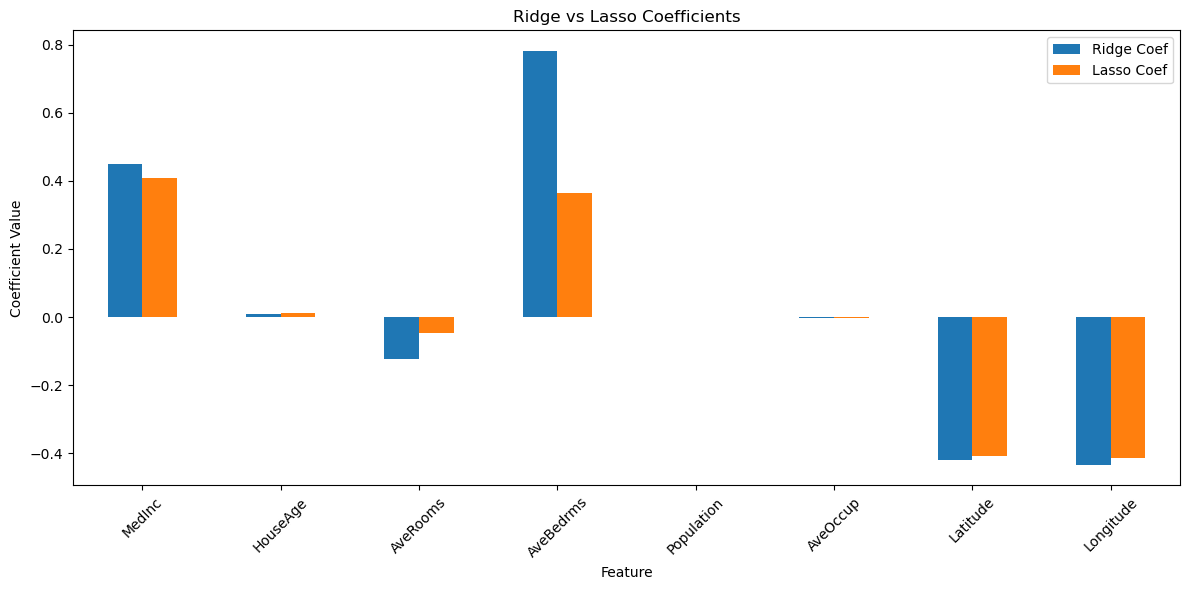

In [21]:
# Compare coefficients between Ridge and Lasso
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Ridge Coef": ridge.coef_,
    "Lasso Coef": lasso.coef_
}).set_index("Feature")

coef_df.plot(kind="bar", figsize=(12,6))
plt.title("Ridge vs Lasso Coefficients")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📊 3. Effect of Regularization Strength (Optional, if you want deeper insight)
How regularization strength (α) affects performance (curve).

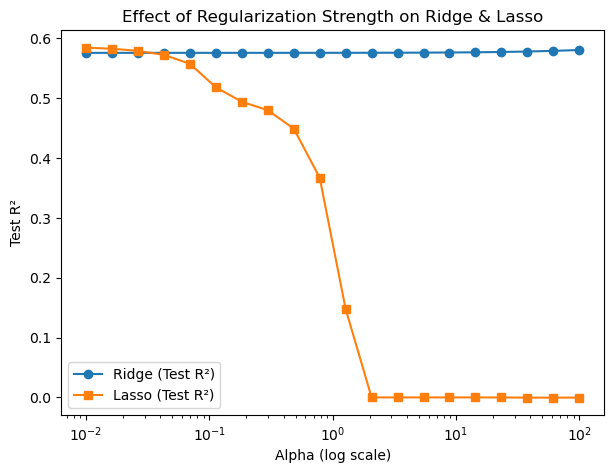

In [22]:
alphas = np.logspace(-2, 2, 20)  # range of alpha values
ridge_scores, lasso_scores = [], []

for a in alphas:
    ridge_model = Ridge(alpha=a).fit(X_train, y_train)
    lasso_model = Lasso(alpha=a, max_iter=10000).fit(X_train, y_train)
    ridge_scores.append(ridge_model.score(X_test, y_test))
    lasso_scores.append(lasso_model.score(X_test, y_test))

plt.figure(figsize=(7,5))
plt.semilogx(alphas, ridge_scores, label="Ridge (Test R²)", marker="o")
plt.semilogx(alphas, lasso_scores, label="Lasso (Test R²)", marker="s")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Test R²")
plt.title("Effect of Regularization Strength on Ridge & Lasso")
plt.legend()
plt.show()
